In [1]:
from eda_code import *

# Bitcoin Accumulation Dashboard – Insight Analysis  
### * Demonstrate how the dashboard’s information meaningfully helps investors make better Bitcoin investment decisions.
### * Using dashboard features to evaluate the performance of the Dynamic DCA strategy
The Dynamic DCA strategy adopted in the dashboard, designed by Youssef Ahmed from the Georgia Institute of Technology, has achieved strong performance, with an average SPD percentile of 89.55% and a 99.41% win rate, outperforming uniform DCA. We have successfully integrated this strategy into our dashboard and further enhanced it with additional indicators, such as risk metrics, news sentiment, and the MSTR purchase signal. This allows users to allocate their budget for purchasing Bitcoin using a user-friendly interface, while also using the dashboard features to monitor performance and incorporate other information into their decision-making process.

However, evaluation metrics and numerical indicators alone can still feel somewhat abstract to users, especially beginners. Without understanding the model mechanics and the logic behind the indicators, users may not fully trust the strategy or feel confident using the dashboard features. Therefore, the goal of this analysis notebook is to use various exploratory data analysis methods, including visualizations, aggregated charts, and other comprehensive analyses, to show how well the current Bitcoin accumulation strategy actually performs, how the dashboard features can be used to evaluate the strategy’s decision-making process, and how the information provided by the dashboard can meaningfully help investors make better Bitcoin investment decisions.

---

# 1. Daily Allocation Insights  
### How does the dashboard tell investors how much to buy each day? And is this allocation behavior reasonable?

## 1.1 Understanding Daily Allocation Behavior
- **Question answered:**  
**1. What does the daily recommended allocation represent?**  
**2. How does allocation change through time?**

### 1.1.1 Daily Recommended Allocation
The daily recommended allocation represents the percentage of an investor’s fixed budget that the Dynamic DCA strategy suggests deploying on each day. Higher allocations indicate stronger buy signals (typically when BTC is relatively cheap), while lower allocations indicate reduced purchasing during more expensive conditions.

### 1.1.2 What Following the Strategy Looks Like Day-to-Day
The animation shows exactly what following the strategy looks like day-to-day: as prices fall, your daily buy amount gradually increases; as prices rise, it naturally tapers off. You can visually see how your money gets deployed through market cycles.

![til](data/allocation_animation_quarterly.gif)

## 1.2 Allocation vs Price Trend
- **Question answered:**  
**1. Does the dynamic DCA strategy increase allocation when Bitcoin is cheap and reduce allocation when it is expensive?**  
**2. Does the dynamic DCA strategy automatically buy more in downturns and slow down during uptrends?** 
- BTC Price and Dynamic Allocation under Non-overlapping Rolling Windows (2018–2025)

First, let’s look at this in the most intuitive way. We want to see whether the core investment strategy shown in the dashboard, the dynamic DCA strategy that tells you how much budget to allocate for buying BTC each day, truly increases allocation when the price is low and decreases allocation when the price is high.  

### 1.2.1 BTC Price and Dynamic DCA Allocation under Non-overlapping 365-Days Rolling Windows (2018–2025)
Since the evaluation metric of this model is to maximize the SPD Percentile of a 365-day rolling window, we are essentially asking whether, within each one-year period, the strategy helps you buy as much Bitcoin as possible given a fixed budget. So we then look further at each year from 2018 to 2025 and check whether this strategy consistently increases allocation at local lows and cuts back at local highs.

I created a combined chart that overlays the BTC price line with allocation weight bars. This lets us look more closely at each year from 2018 to 2025 and check whether the strategy consistently increases allocation at local lows and cuts back at local highs.  
Ideally, we should see higher allocation weights when the price is at local lows, lower weights when the price is high, and extra allocation added after sharp drawdowns near the bottom or right before major price rallies.

- Between June 2018 and June 2019, the price reached a clear low point around the middle of the year. We can see that the strategy concentrated more allocation during this period, and it also increased the investment weight immediately as the price dropped to its bottom.

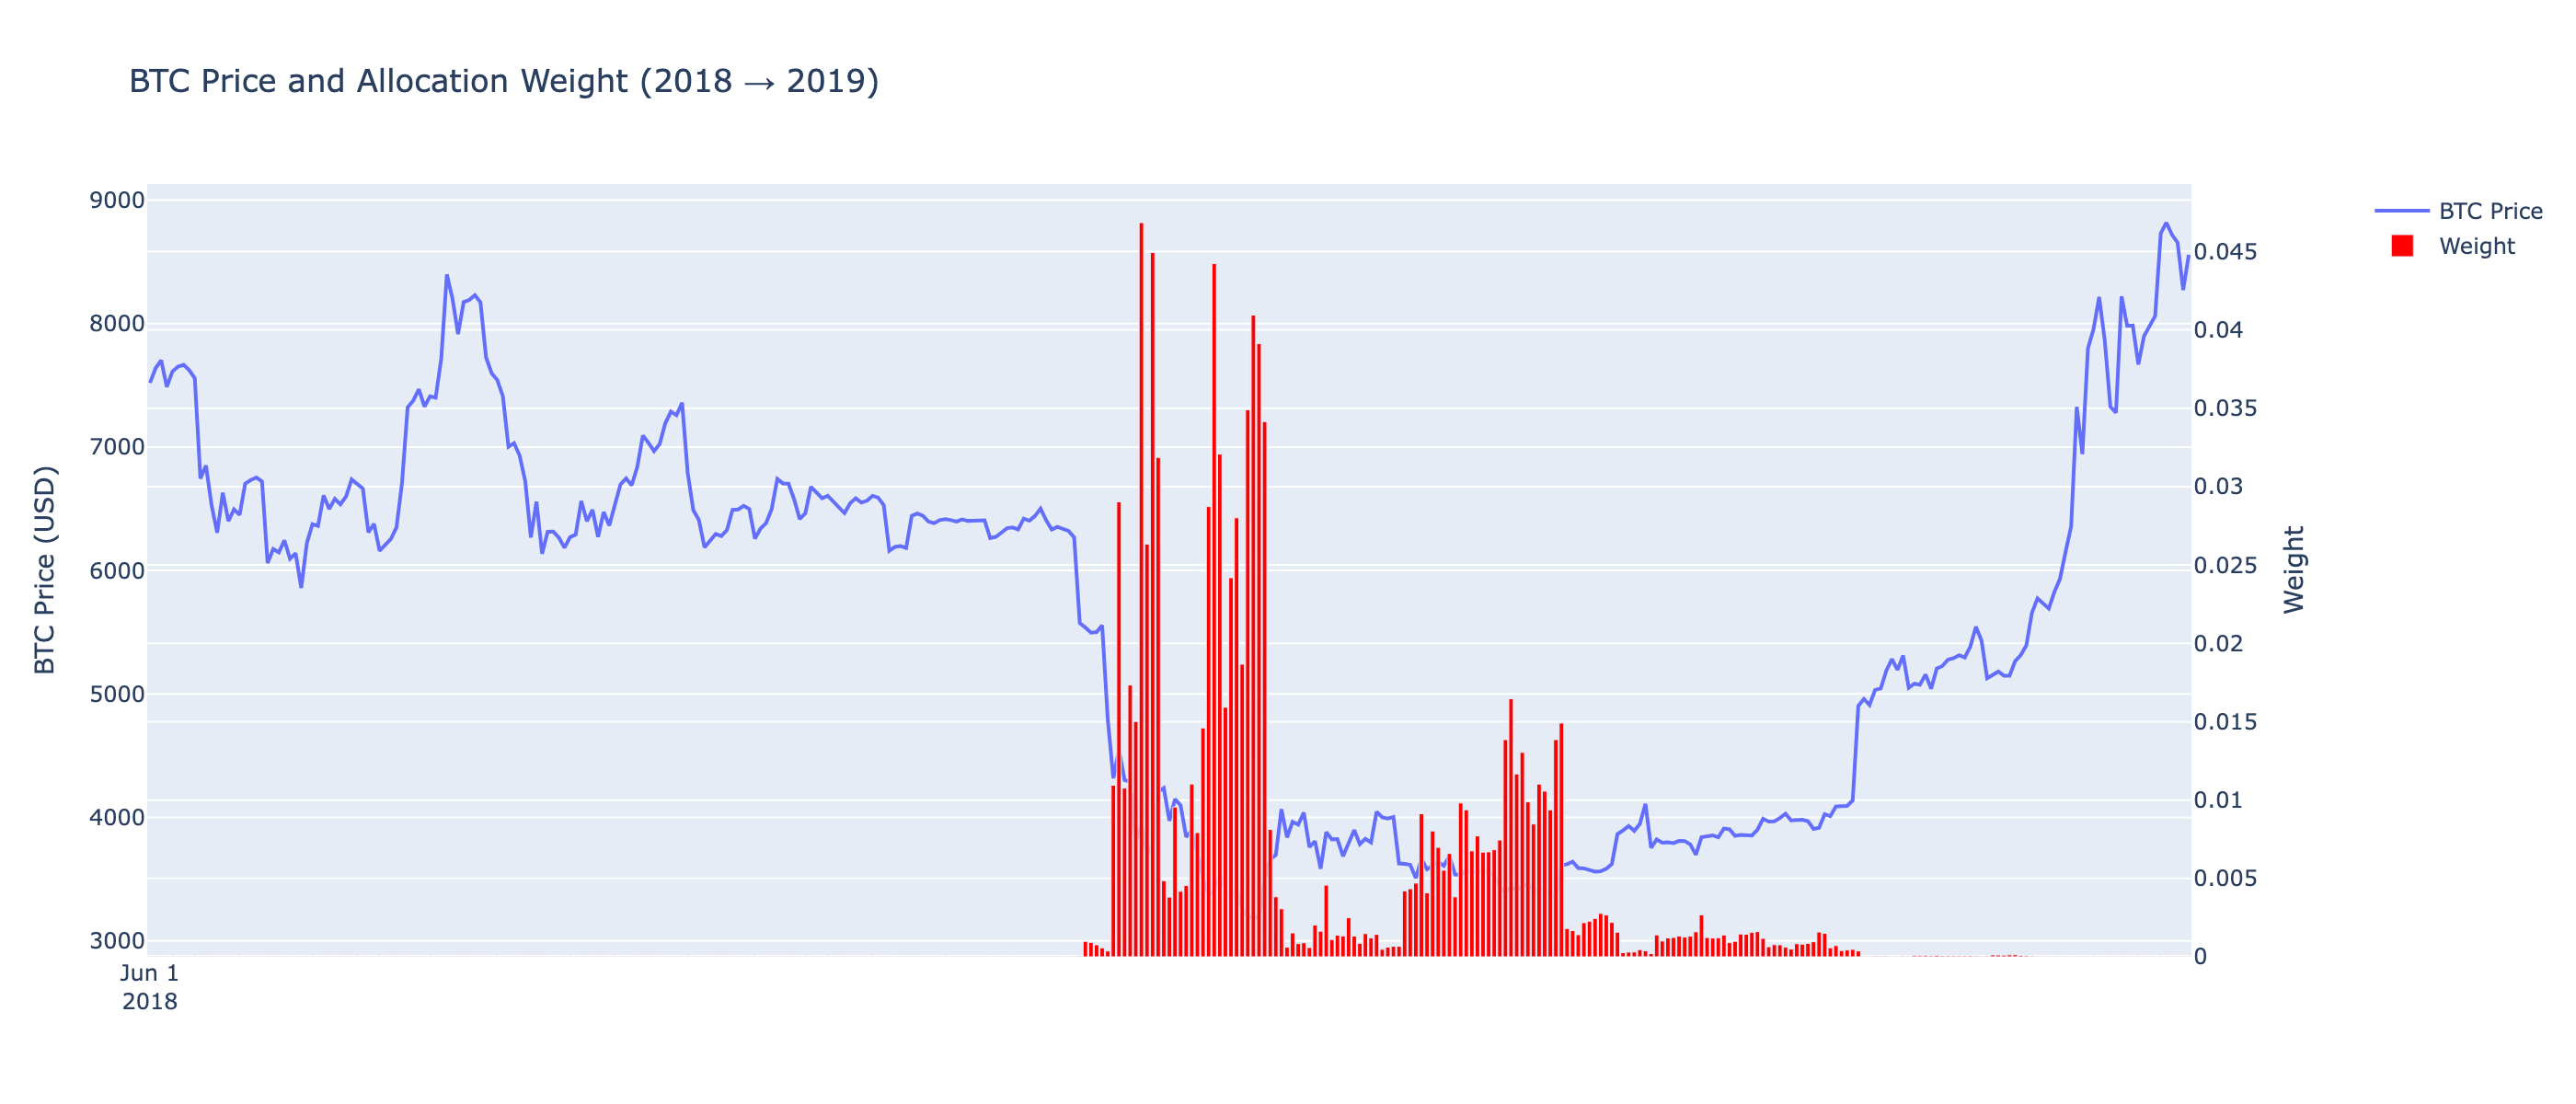

In [3]:
plot_weight_price_by_year(2018)

- Between June 2019 and June 2020, the price moved in a more volatile, sideways pattern, without a clearly defined low range. However, we can still observe that the strategy significantly increased its allocation at the historical low point, and did so specifically when the price dropped sharply to that bottom level.

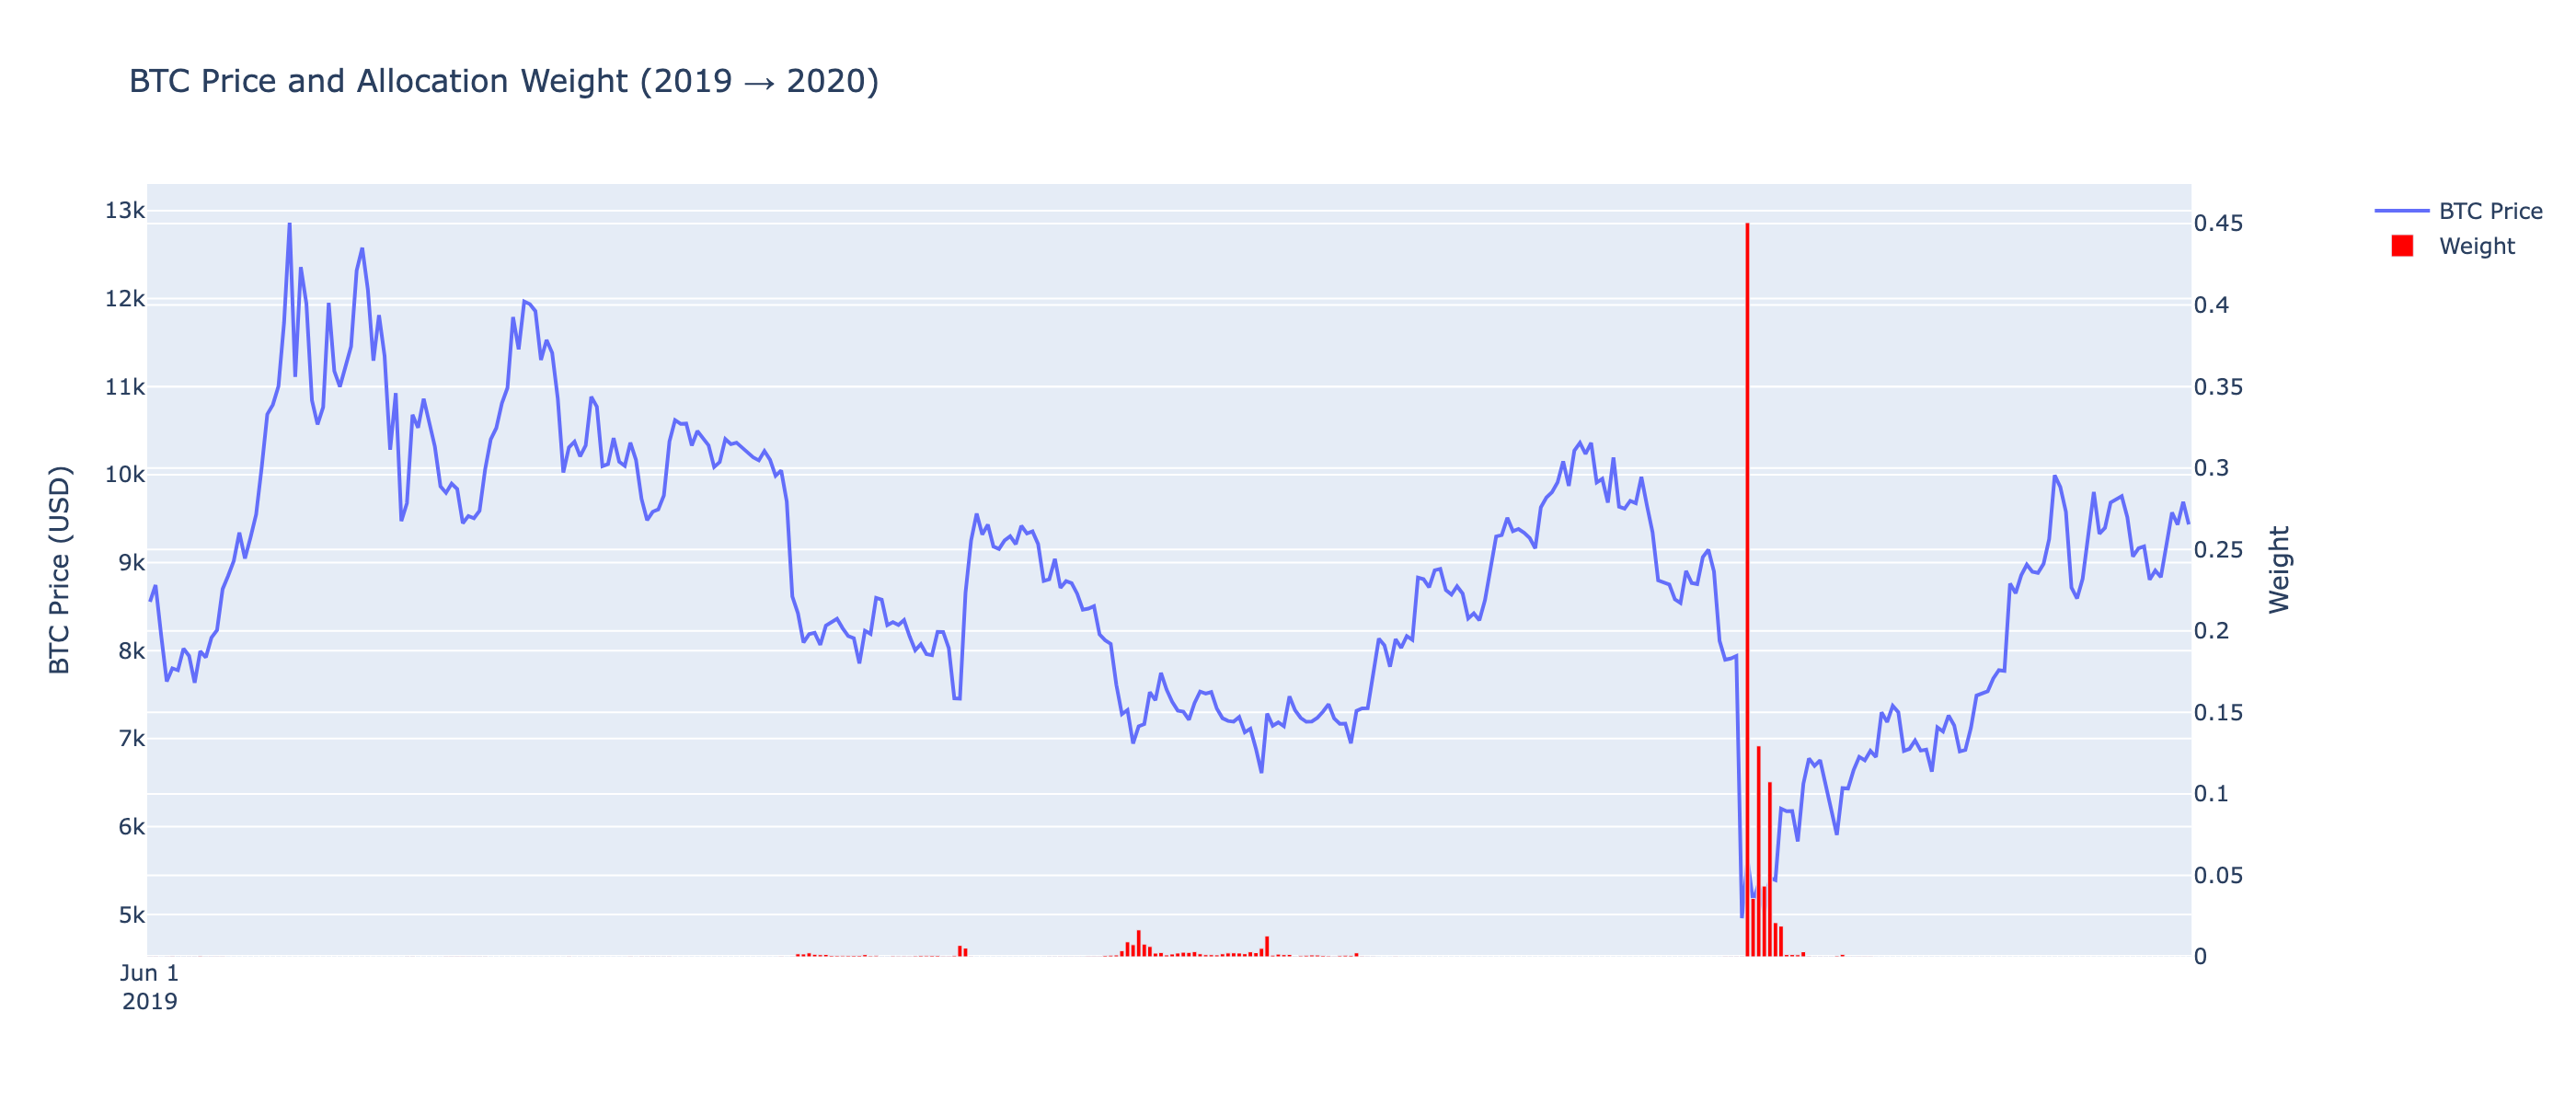

In [4]:
plot_weight_price_by_year(2019, 2020)

- Between June 2020 and June 2021, the price trend showed a clear pattern, with a low at the beginning of the year and a high toward the end of the year. We can see that the strategy concentrated more allocation at the beginning of the year.

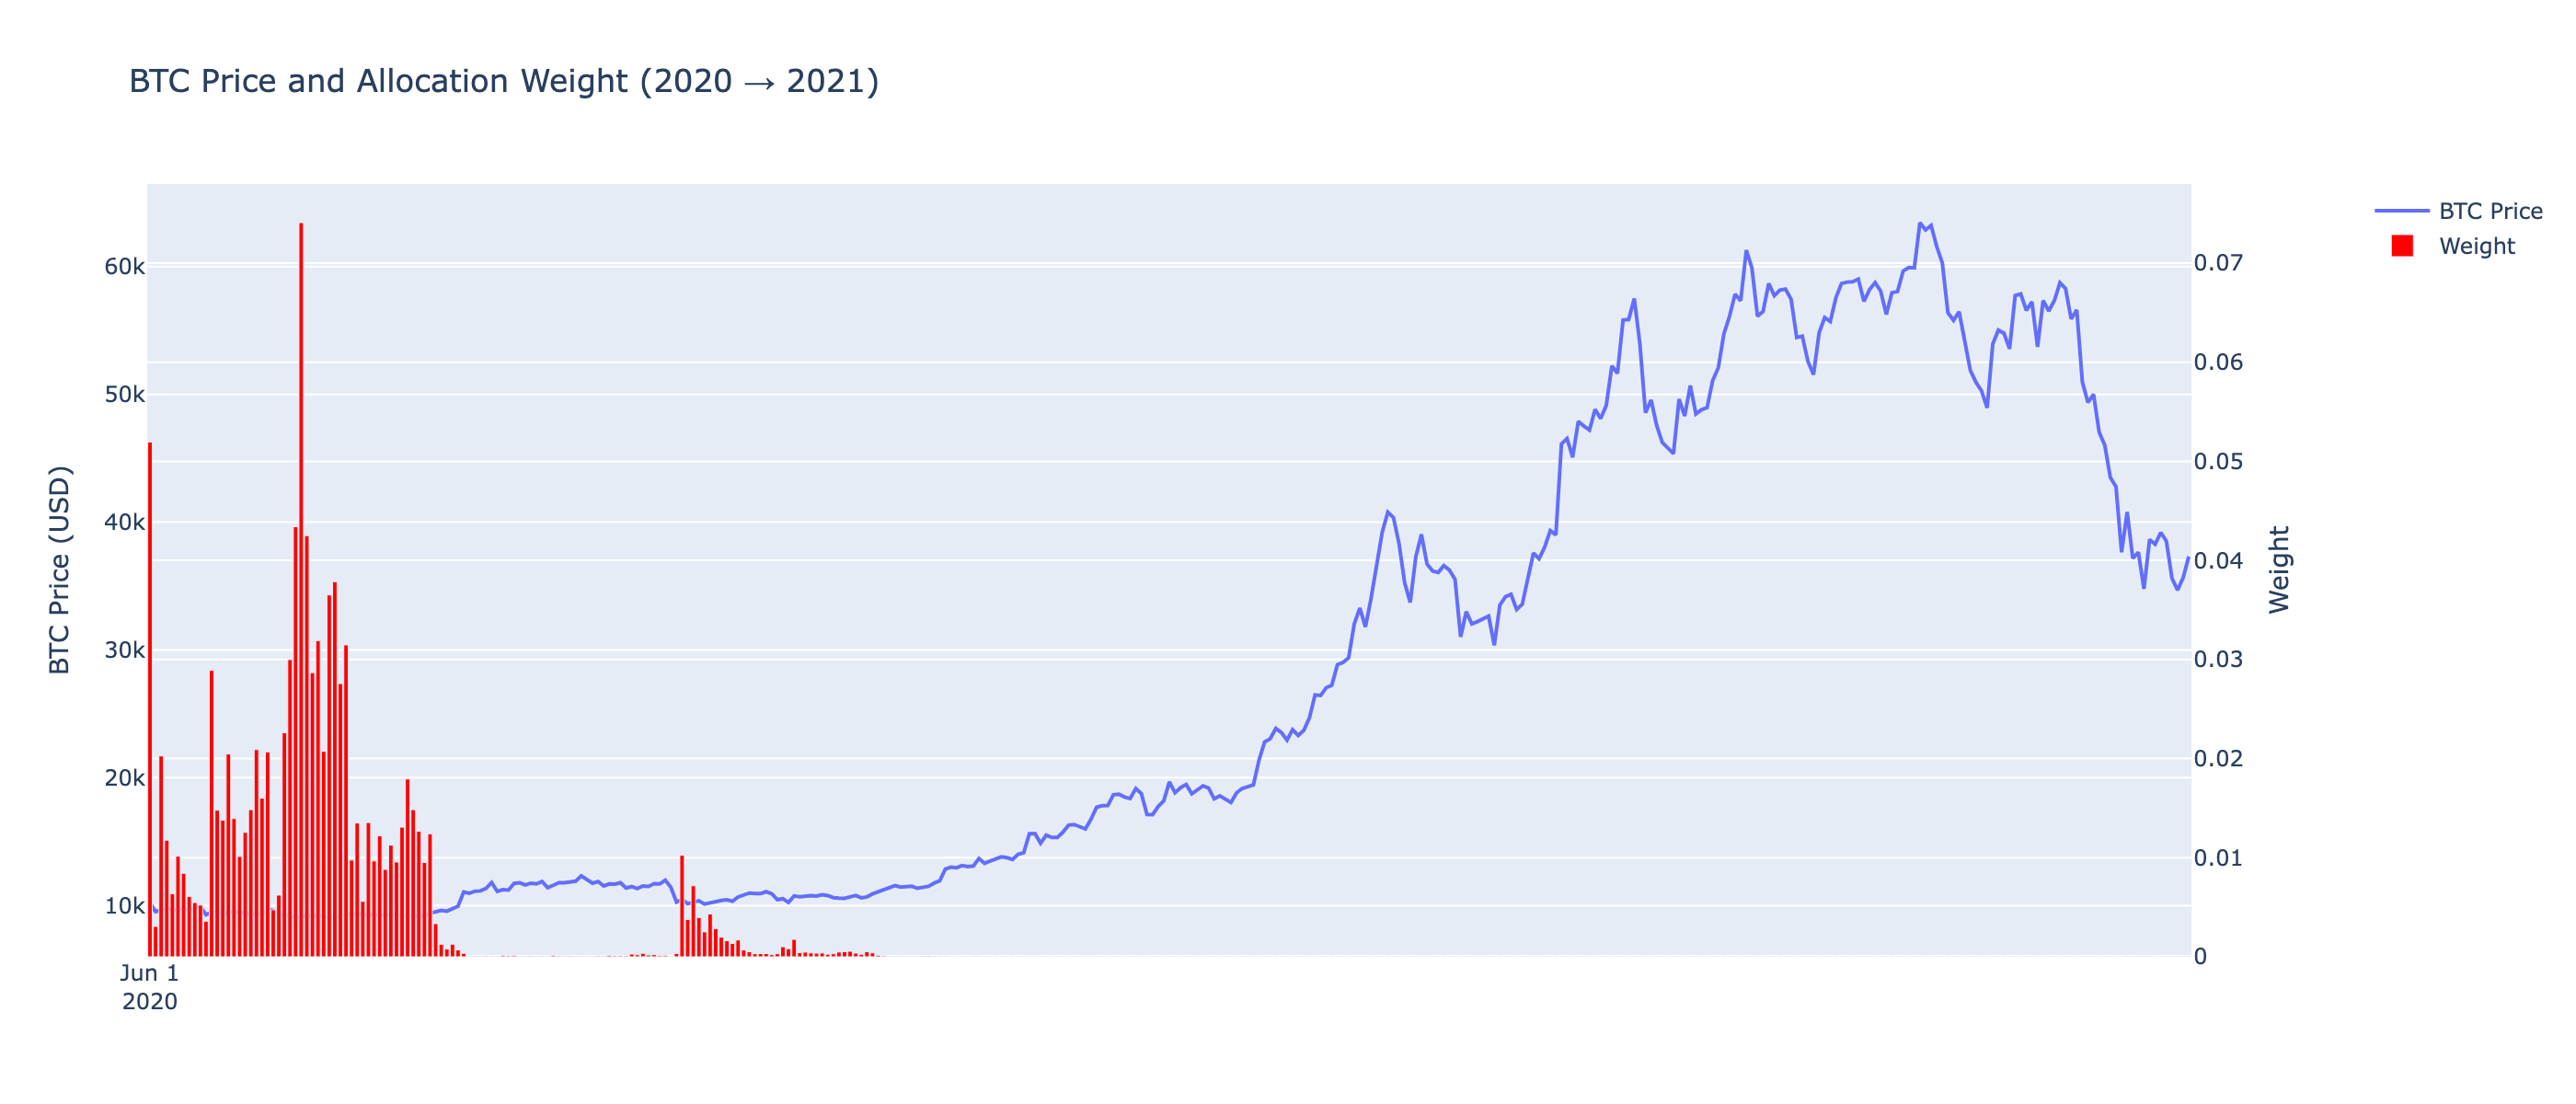

In [5]:
plot_weight_price_by_year(2020, 2021)

- Between June 2020 and June 2021, the price trend showed lows at the beginning and end of the year, with a high in the middle of the year. The strategy chose to concentrate more allocation toward the end of the year.

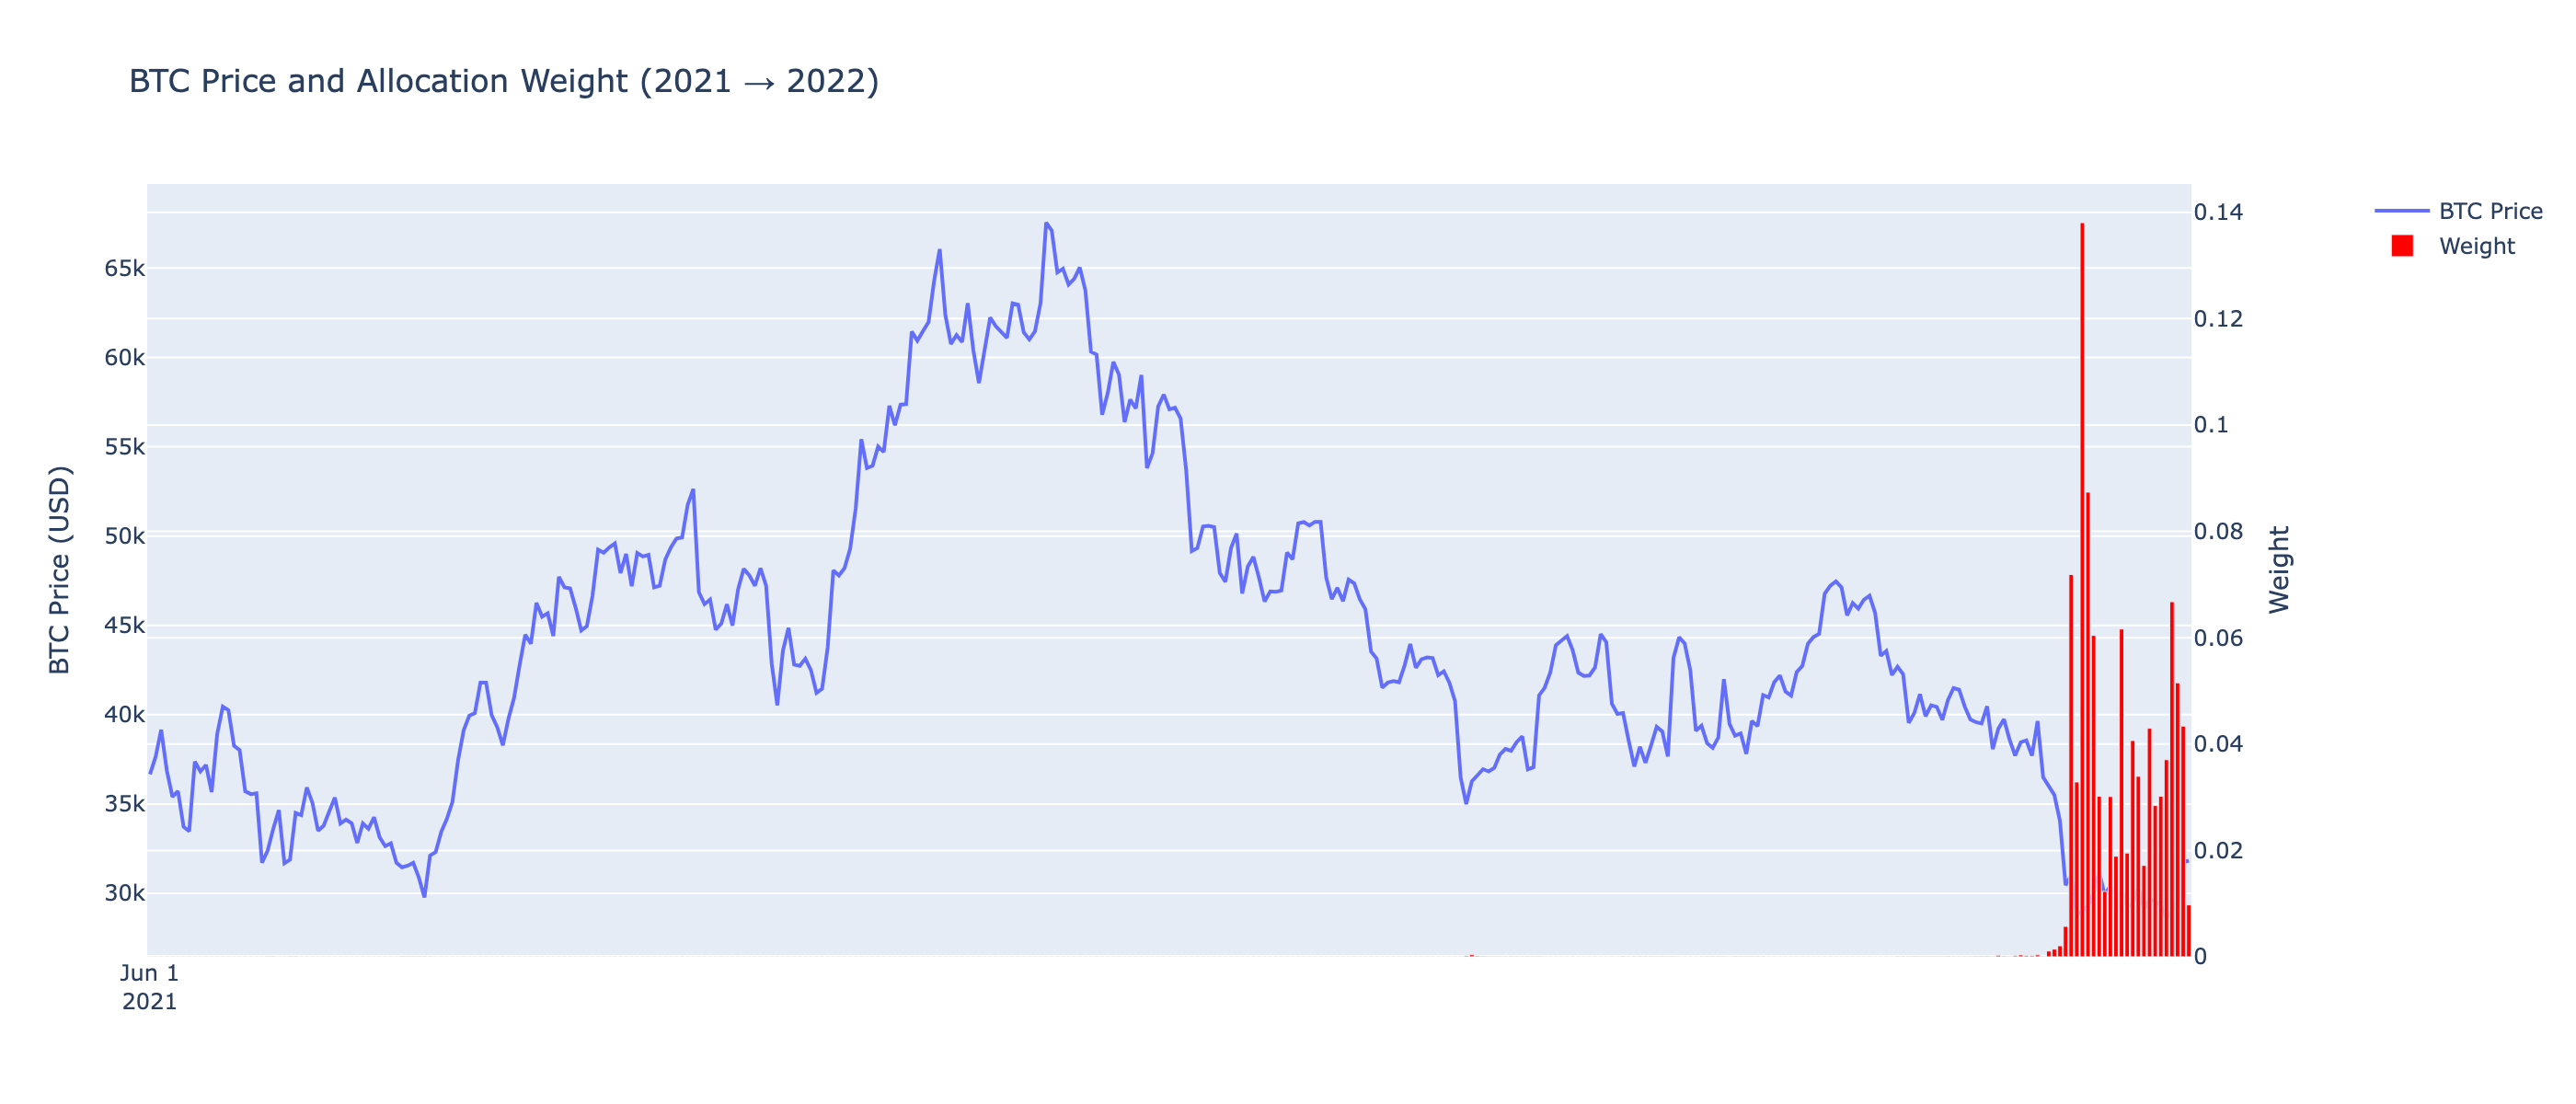

In [6]:
plot_weight_price_by_year(2021, 2022)

- Between June 2022 and June 2023, the price trend showed highs at the beginning and end of the year, with a low in the middle. We can see that the strategy concentrated its allocation around the mid-year low. In addition, when there was a sharp drop in price at the beginning of the year, the model chose to increase allocation right after that drawdown.

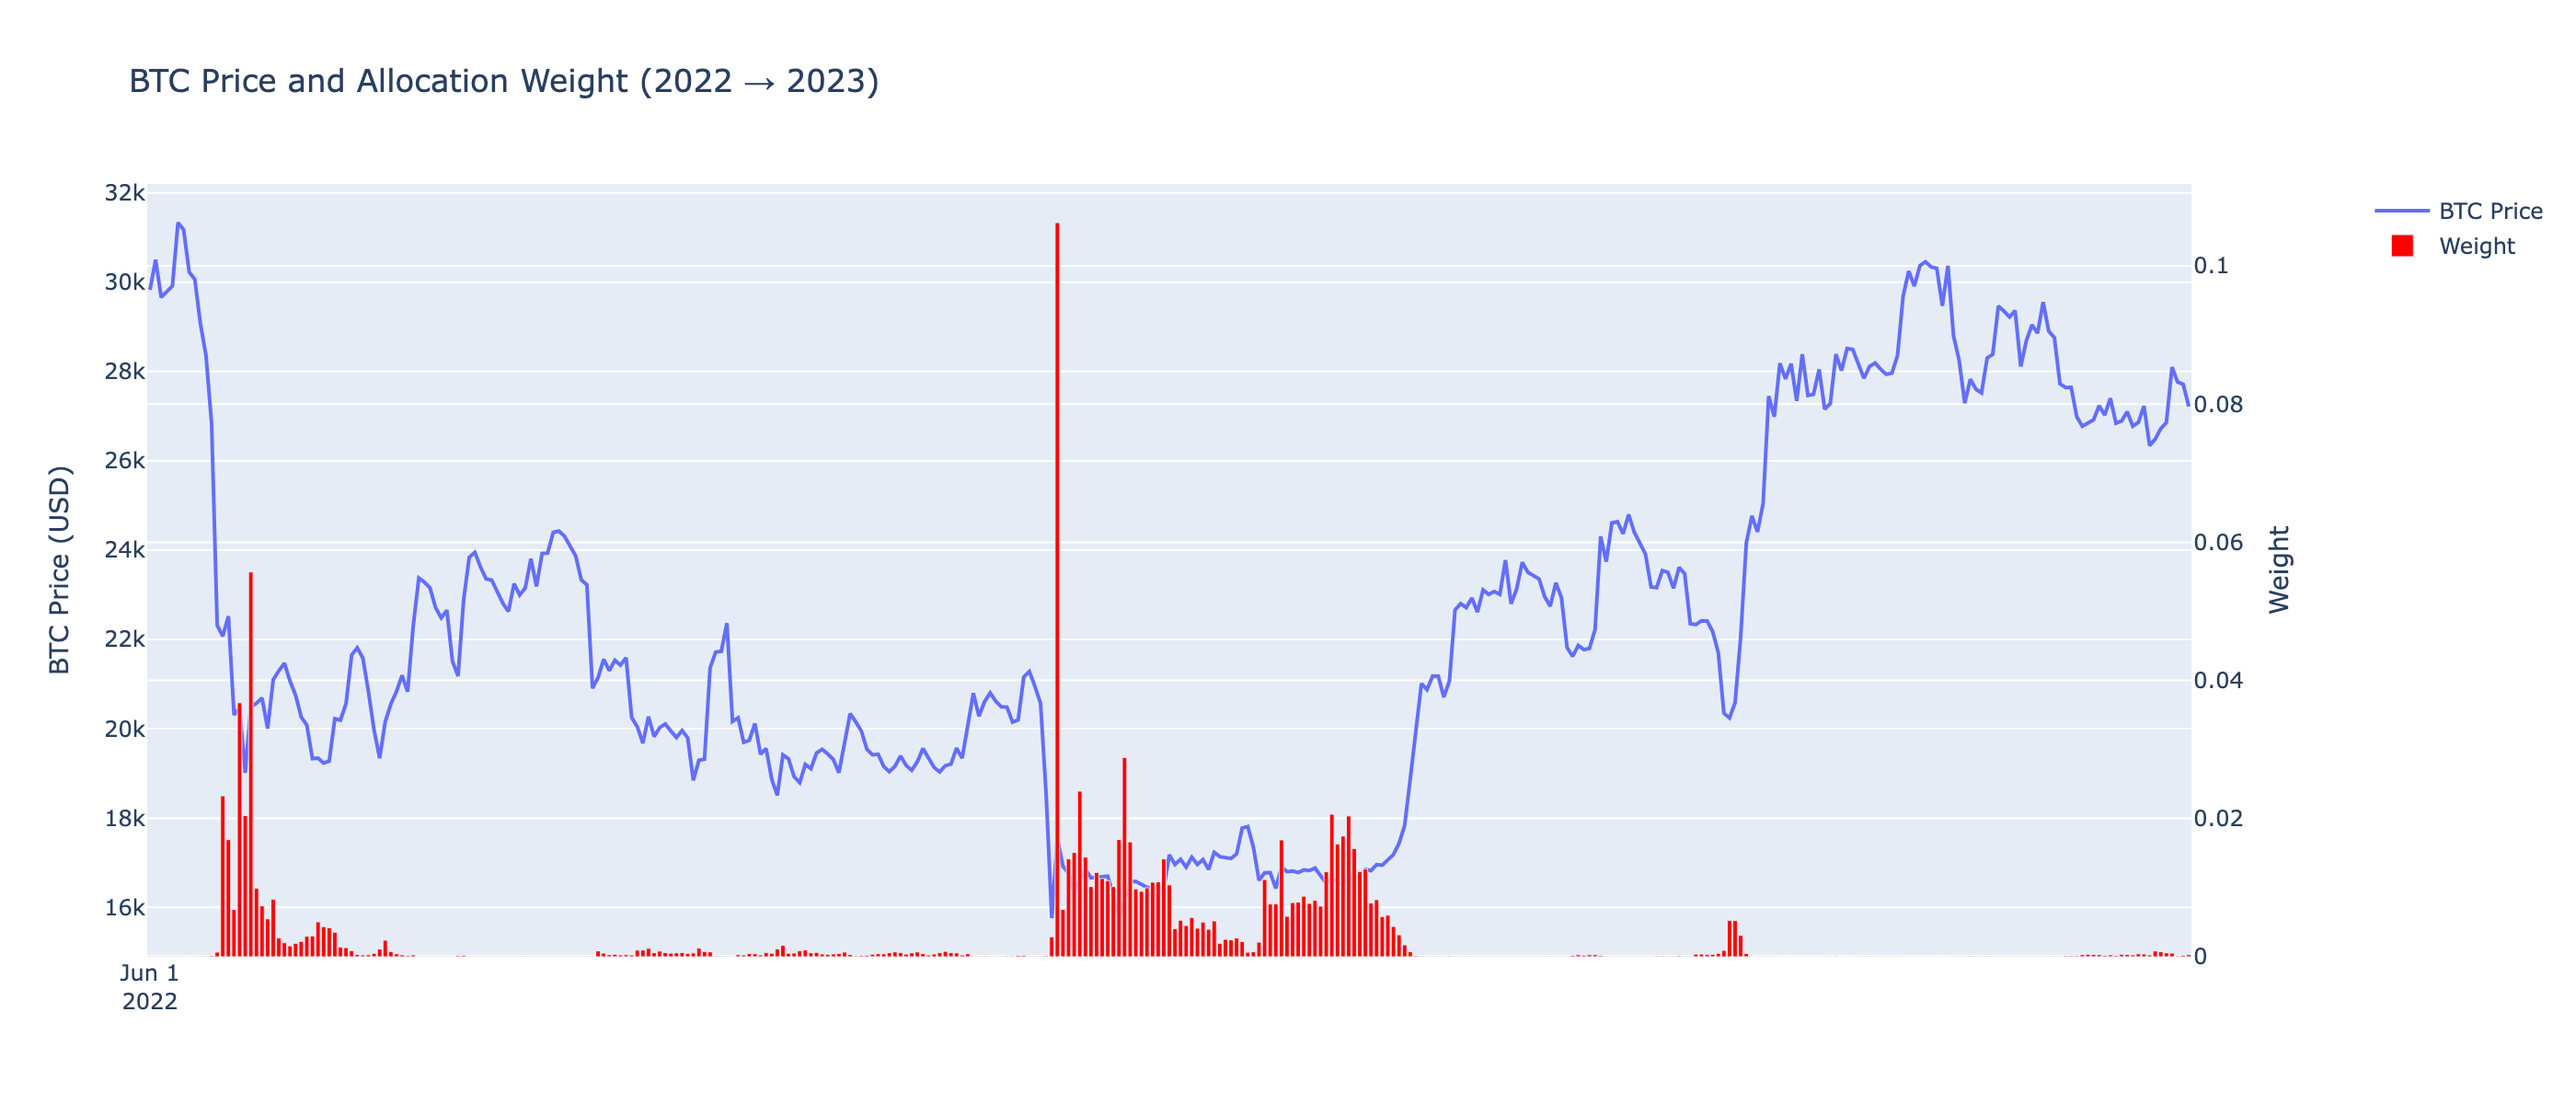

In [7]:
plot_weight_price_by_year(2022, 2023)

- Between June 2023 and June 2024, the price trend showed a clear pattern, with a low at the beginning of the year and a high toward the end of the year. We can see that the strategy concentrated its allocation at the beginning of the year, and it increased the weight specifically around those relatively low price points.

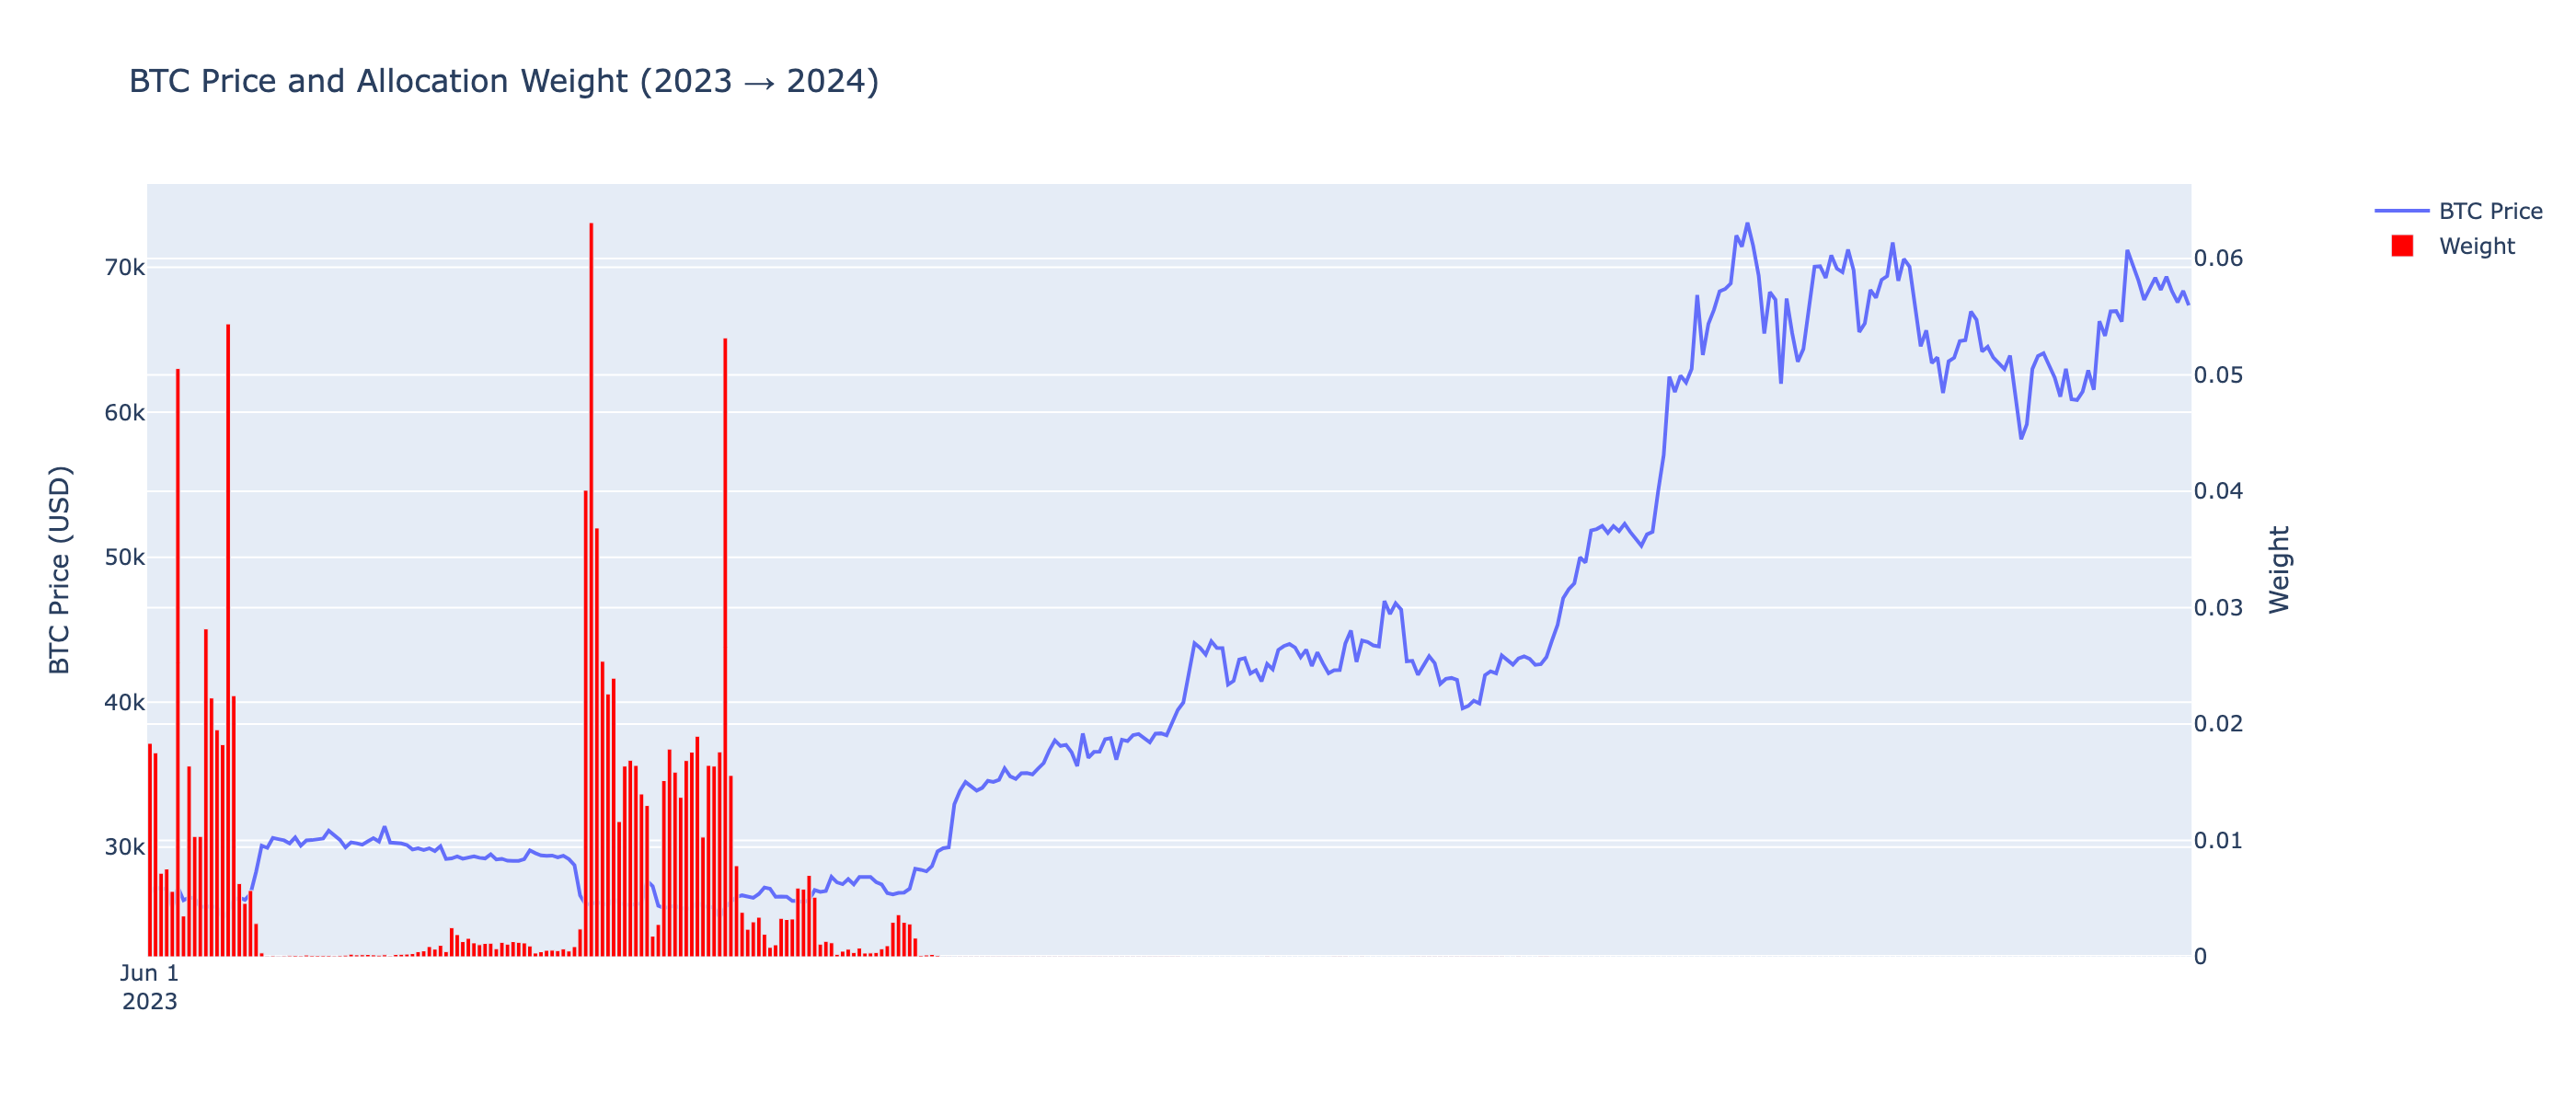

In [8]:
plot_weight_price_by_year(2023, 2024)

- Between June 2023 and June 2024, the price trend also generally showed a low at the beginning of the year and a high toward the end of the year. We can see that the strategy concentrated its allocation at the beginning of the year, and increased the weight around those relatively low price levels.

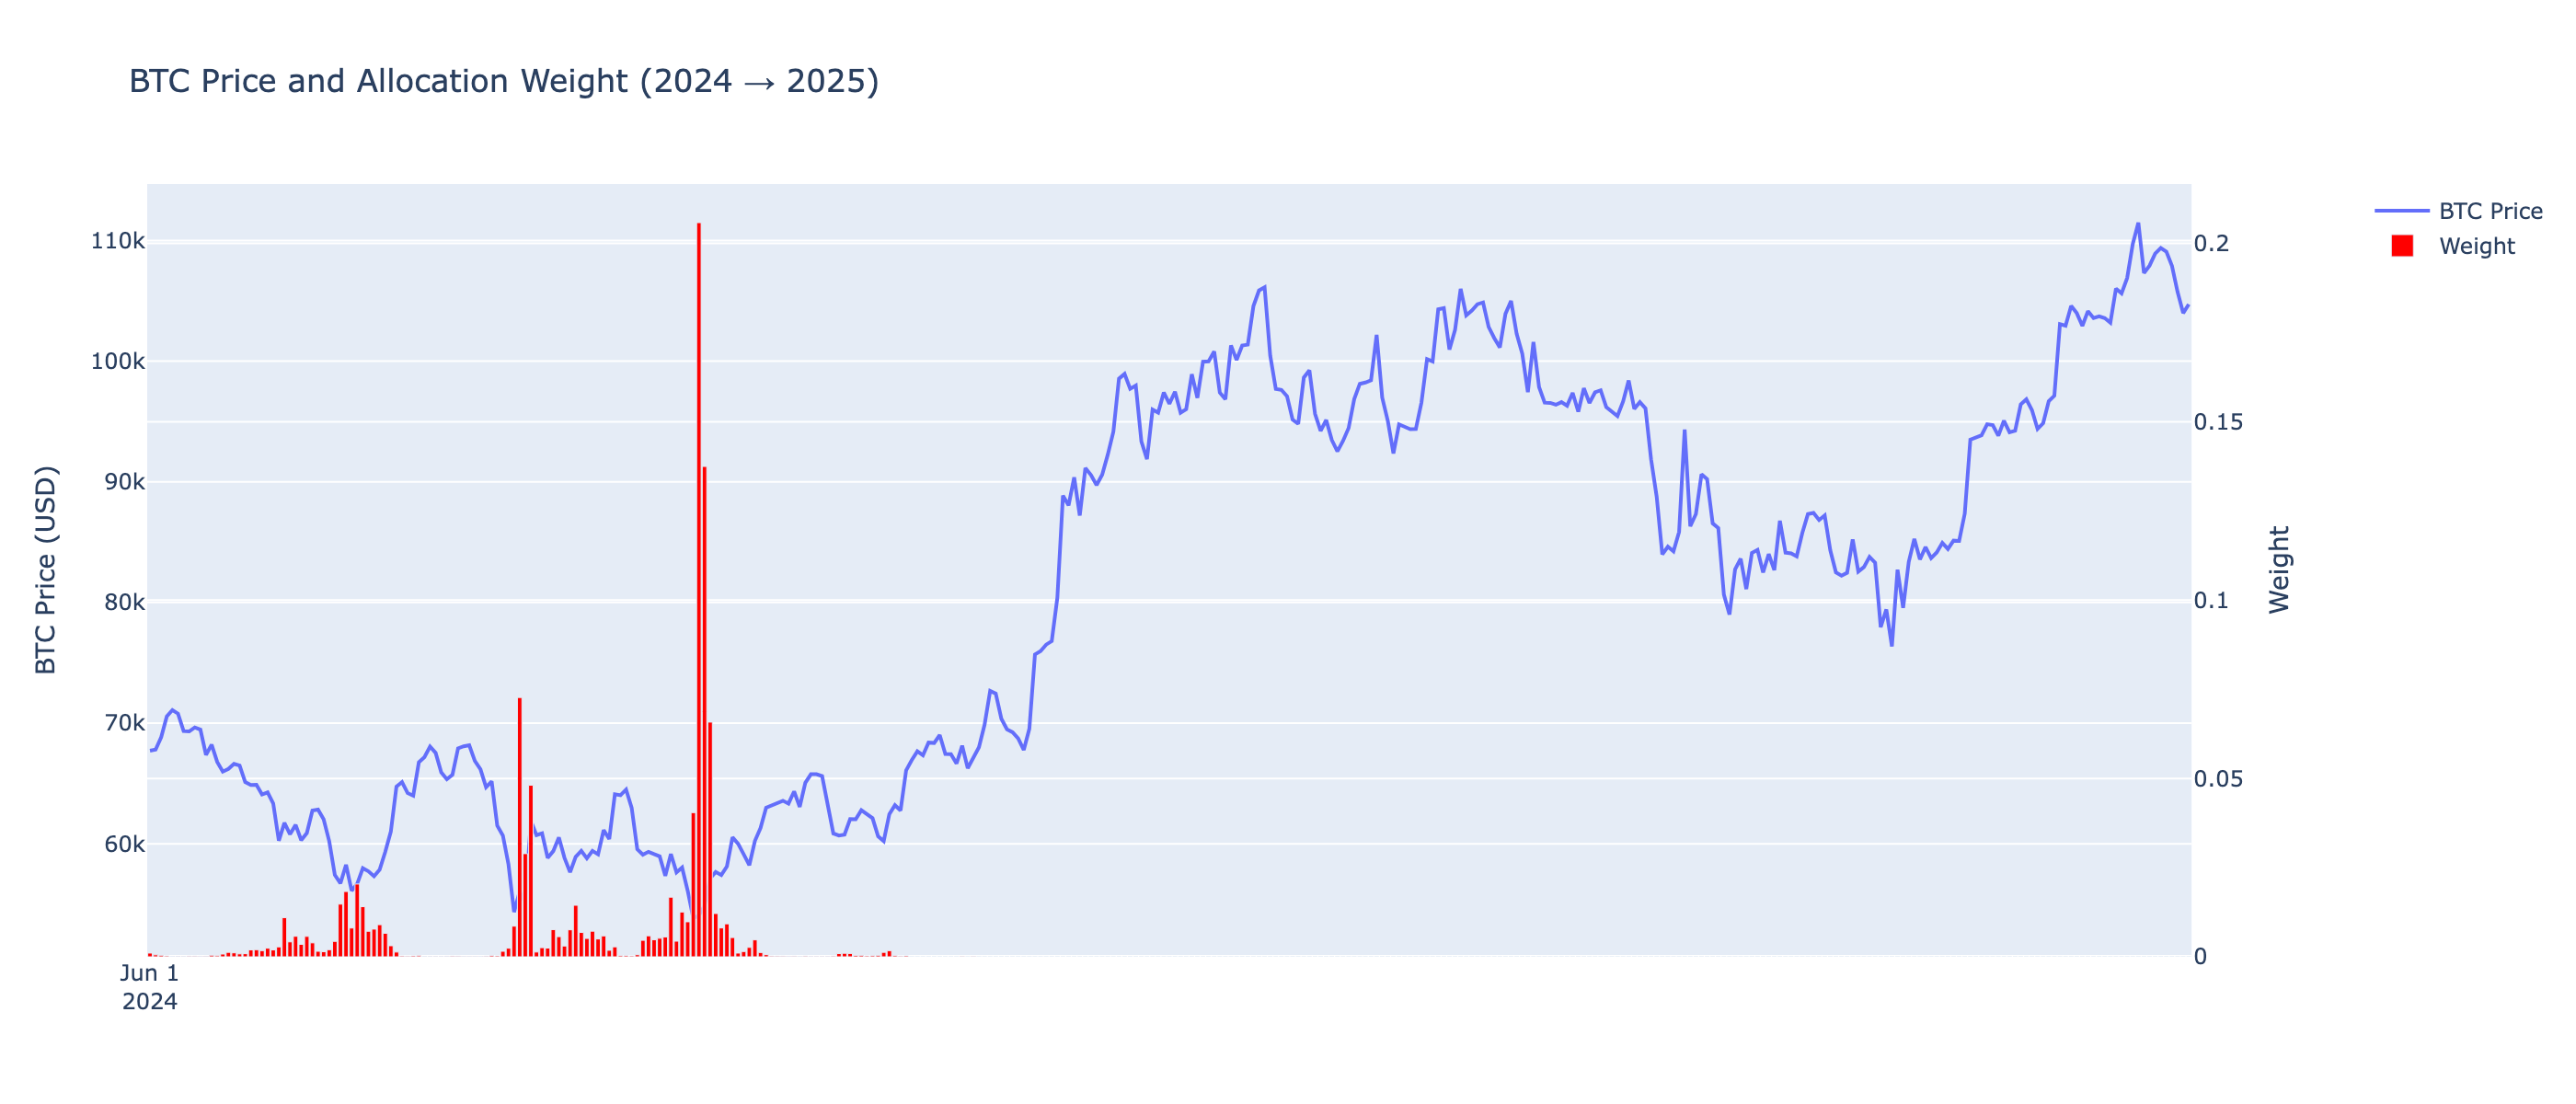

In [9]:
plot_weight_price_by_year(2024, 2025)

## 1.3 Allocation Behavior by Market Regime  
- **Question answered:**  
  **How does the dashboard adapt allocation based on market regimes?**  
- Define Bull / Bear / Sideways regimes using MA200.  
- Compare mean allocation per regime.

In this section, we compare the average allocation under different market regimes (bull, bear, and sideways). This helps us understand whether the strategy automatically adjusts its aggressiveness based on the broader market condition. If allocation is higher in bear regimes and lower in bull regimes,
it suggests that the dashboard naturally buys more in weak markets and scales back in strong markets.

- I define a bear regime as days when the price is more than 10% above the 20-day moving average, and a bull regime as days when the price is more than 10% below the 20-day moving average, with the remaining days classified as sideways.
- From the table, we can clearly see that the average allocation is significantly higher in the bear regime than in the sideways and bull regimes, and it is lowest in the bull regime.

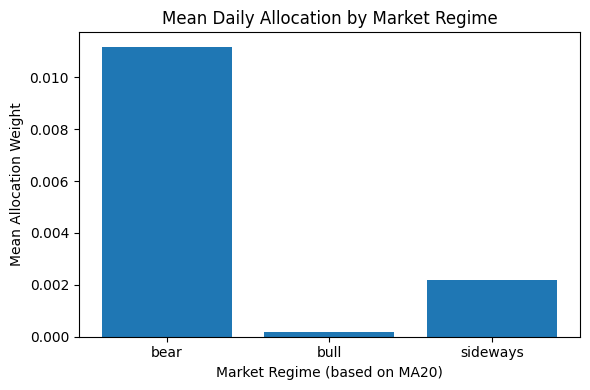

,regime,weight
0,bear,0.011170
1,bull,0.000186
2,sideways,0.002173


In [10]:
plot_allocation_by_regime(buffer = 0.1) 

---

# 2. Investment Efficiency Insights  
### Does the information provided by the dashboard help investors buy more BTC with the same amount of money?

## 2.1 SPD Percentile vs Allocation – Are We Buying Cheap or Expensive?  
- **Question answered:**  
  **Does the dashboard help identify good buying opportunities?**  
- Visualize distribution of SPD percentile and strategy allocation.

By visualizing the distribution of SPD Percentiles alongside strategy allocation, we can assess whether the strategy is effectively identifying favorable buying opportunities.   
Ideally, this analysis should show a positive relationship between SPD Percentile and allocation. In other words, the strategy should allocate more budget when the SPD Percentile is high (relatively cheap) and reduce allocation when the SPD Percentile is low (relatively expensive).  
* SPD stands for “Spending Power of a Dollar.” It measures how much Bitcoin 1 dollar can buy on a given day. A higher SPD means Bitcoin is relatively cheap (your dollar buys more BTC), and a lower SPD means Bitcoin is relatively expensive.


### 2.1.1 SPD Percentile vs Allocation Weight (Aggregated Across Non-Overlapping 365-Day Windows: 2011–2025)

- From this scatter plot, we see a clear positive relationship between SPD Percentile and allocation weight. When the SPD percentile is low, the strategy allocates almost nothing. As the SPD percentile increases, the allocation weight rises, and it increases sharply in the 80–100 percentile range, indicating a strong preference to allocate more when Bitcoin is relatively cheapest.

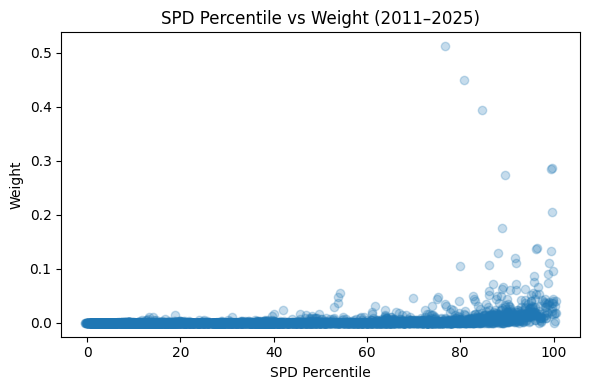

In [11]:
plot_percentile_vs_weight()

- This boxplot shows the distribution of allocation weights across different SPD percentile buckets. Both the median and the mean (red dots) increase steadily from the lowest to the highest bucket. In particular, the 80–100 percentile group has by far the highest average weight, and its quartiles are packed very close together, meaning the allocations in this bucket are tightly clustered. This suggests that the strategy not only allocates more when Bitcoin is relatively cheapest, but also behaves more consistently in that cheap range.

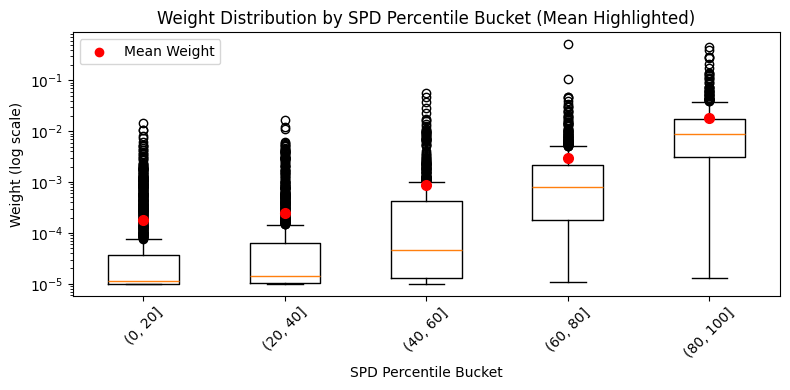

In [12]:
plot_weight_by_spd_bucket()


## 2.2 Relationship Between SPD Percentile & Future Returns  
- **Question answered:**  
  **Is buying during low SPD percentile historically more profitable?**  
- Event alignment: percentile vs future 30/60/365-day returns.

Return is ultimately the most important factor in investing, and it should be evaluated across short-, medium-, and long-term horizons. Therefore, I further examine whether buying at higher SPD percentile levels within each rolling window can actually generate positive short-, medium-, and long-term returns.   
Ideally, SPD Percentile should exhibit a strong positive relationship with future returns across all three time horizons. Combined with the earlier analysis, which shows that the strategy’s allocation is concentrated at higher SPD percentiles, this would suggest that the strategy is well positioned to achieve strong performance in the short, medium, and long term.

### 2.2.1 Alignment Between Future Returns, SPD Percentile and Strategy Allocation

I plotted scatter charts of SPD Percentile against 30-day, 60-day, and 365-day returns, with point size scaled by the allocation weight. Across all three plots, we can see a clear positive relationship between SPD Percentile and future returns. At the same time, the strategy’s allocations are concentrated in the high SPD percentile region. Taken together, this suggests that the strategy tends to allocate capital in zones that generate strong short-, medium-, and long-term returns

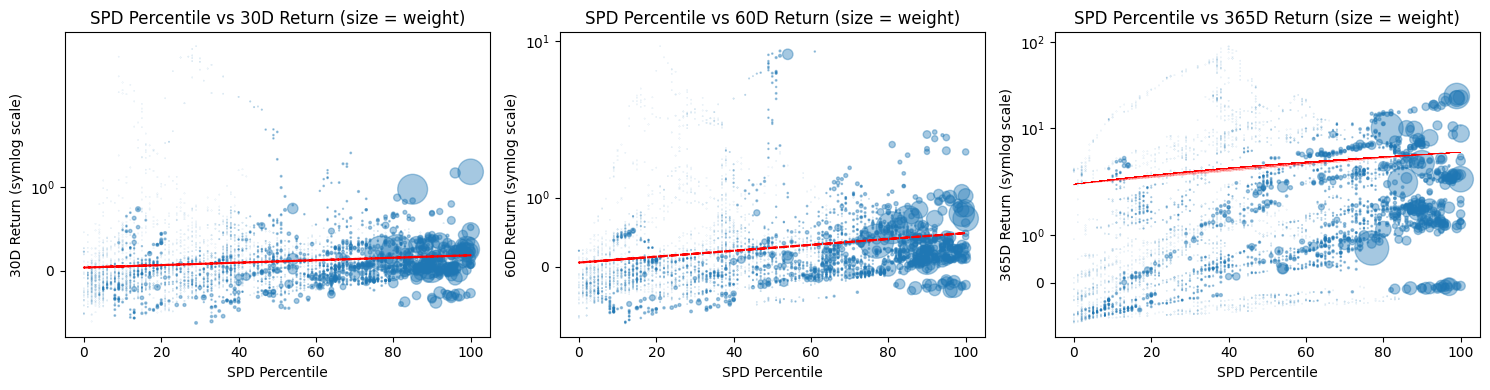

In [13]:
plot_weighted_forward_returns_with_trend()

## 2.3 Investment Efficiency: Dynamic vs Uniform DCA
- **Question answered:**  
**Which strategy uses capital more efficiently to accumulate Bitcoin over time?**
- Evaluation metric:
    1. Total BTC Accumulation: The total amount of Bitcoin accumulated over time given a fixed investment budget.
    2. Weighted Avg SPD (Satoshis per Dollar): The average amount of satoshis acquired per dollar invested, weighted by the actual allocation.
    3. Effective Avg Purchase Price ($/BTC): The average price paid per Bitcoin, calculated as total investment divided by total BTC accumulated.
    4. Timing Efficiency: The percentage of capital allocated during historically cheap price periods (e.g., bottom 30% percentile).


With the same investment budget, Dynamic DCA accumulates significantly more Bitcoin at nearly half the average cost, primarily by allocating almost all capital to historically cheapest market conditions.

In [14]:
compare_dynamic_vs_uniform_efficiency()

,Dynamic DCA,Uniform DCA
Total BTC Accumulation,372.0,199.8
Weighted Avg SPD (sats per $),3719781.8,1997695.2
Effective Avg Purchase Price ($/BTC),26.9,50.1
Timing Efficiency (% capital in top 30%),97.4,58.1


# 3. Risk Awareness & Portfolio Stability  
### Does the dashboard help investors better understand the risks? Where in the investment process will it hurt, and how much will it hurt?

## 3.1 Summary of Risk Metrics  
- **Question answered:**  
  **What is the risk profile of the dashboard’s allocation approach?**
- Sharpe, Sortino, Max Drawdown, Volatility, Final Portfolio Value  


## 3.2 Drawdown Timeline Analysis  
- **Question answered:**  
  **When are the most painful drops? How severe are they?**  
- Drawdown curve visualization.

## 3.3 Volatility Hotspots  
- **Question answered:**  
  **How does the strategy behave during high-volatility periods?**
- Rolling volatility analysis.  


## 3.4 Allocation Response to Risk  
- **Question answered:**  
  **Does the dashboard reduce allocation when volatility spikes?**  
- Overlay allocation with volatility.

---

# 4. Market Understanding Insights  
### Do the dashboard’s market indicators (MA200, news sentiment, MSTR) help investors better understand the market? What additional insights do they provide?

## 4.1 Price vs MA200 – Long-Term Trend Understanding  
- **Question answered:**  
  **What does MA200 show about overall market conditions?**  
- Break down bull/bear cycles visually.

## 4.2 News Sentiment Impact  
- **Question answered:**  
  **Do negative news days align with cheaper buying opportunities (lower SPD percentile)?**  
- Sentiment vs SPD percentile analysis.

## 4.3 Allocation Behavior During Sentiment Extremes  
- **Question answered:**  
  **Does the dashboard react sensibly during sentiment spikes (fear/euphoria)?**  
- Compare allocation during negative/high sentiment days.

## 4.4 MSTR Purchase Indicator – Institutional Behavior Insight  
- **Question answered:**  
  **What can investors learn from MSTR buying patterns?**  
- Price/MSTR events/SPD overlay.

## 4.5 MSTR Events vs Future Price Performance  
- **Question answered:**  
  **Does MSTR buy low or buy high?  
  Should retail investors pay attention to MSTR behavior?**  
- Short-term event study.

---

# 5. Integrated Insights – What This Dashboard Offers to Investors  
### By integrating all the information in the dashboard, what actionable behaviors and insights can it provide to investors?

## 5.1 Actionable Insights Summary  
- How allocation adjusts intelligently  
- How SPD provides objective buying quality  
- How risk metrics help investors understand drawdowns  
- How sentiment/MSTR provide market context

## 5.2 How Investors Should Use the Dashboard Day-to-Day  

## 5.3 Limitations & Future Improvements  
- MSTR signal is lagging
- The strategy only optimize the performance under 365-window size.
- No transaction costs  
- Strategy assumes consistent budget  
- Sentiment sources limited  

# 6. Appendix
- how to interpret alpha and beta in dynanic DCA model